In [4]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
zoo = pd.read_csv("zoo.csv")
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [22]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


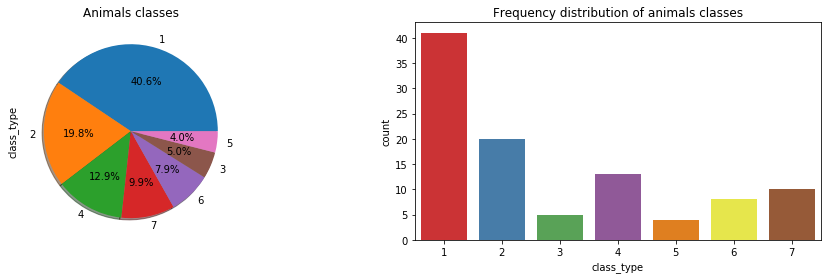

In [17]:
f,ax = plt.subplots(1,2,figsize=(16,4))

ax[0] = zoo['class_type'].value_counts().plot.pie(explode=[0,0,0,0,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Animals classes')
ax[1] = sns.countplot(x="class_type", data=zoo, palette="Set1")
ax[1].set_title("Frequency distribution of animals classes")
plt.show()

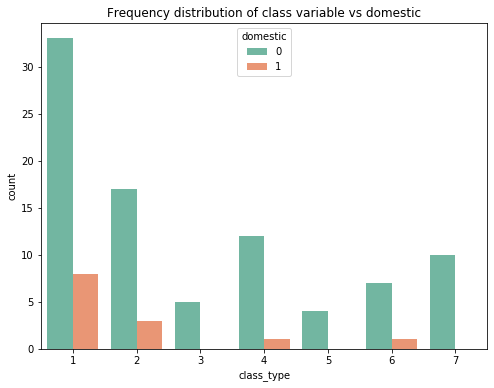

In [12]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="class_type", hue="domestic", data=zoo, palette="Set2")
ax.set_title("Frequency distribution of class variable vs domestic")
plt.show()

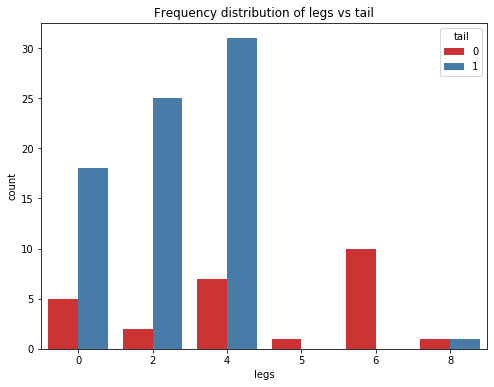

In [14]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="legs", hue="tail", data=zoo, palette="Set1")
ax.set_title("Frequency distribution of legs vs tail")
plt.show()

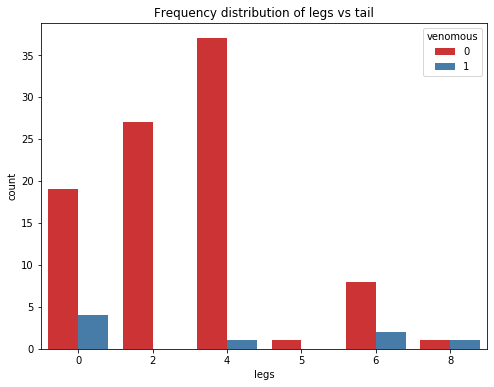

In [18]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="legs", hue="venomous", data=zoo, palette="Set1")
ax.set_title("Frequency distribution of legs vs venomous")
plt.show()

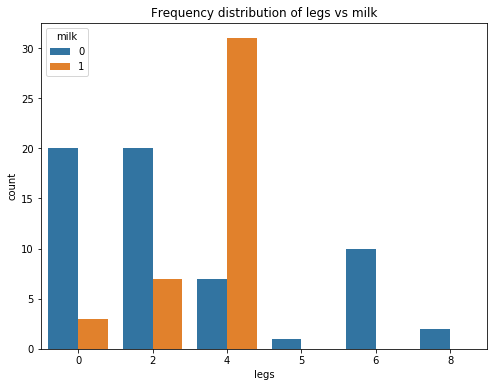

In [22]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="legs", hue="milk", data=zoo)
ax.set_title("Frequency distribution of legs vs milk")
plt.show()

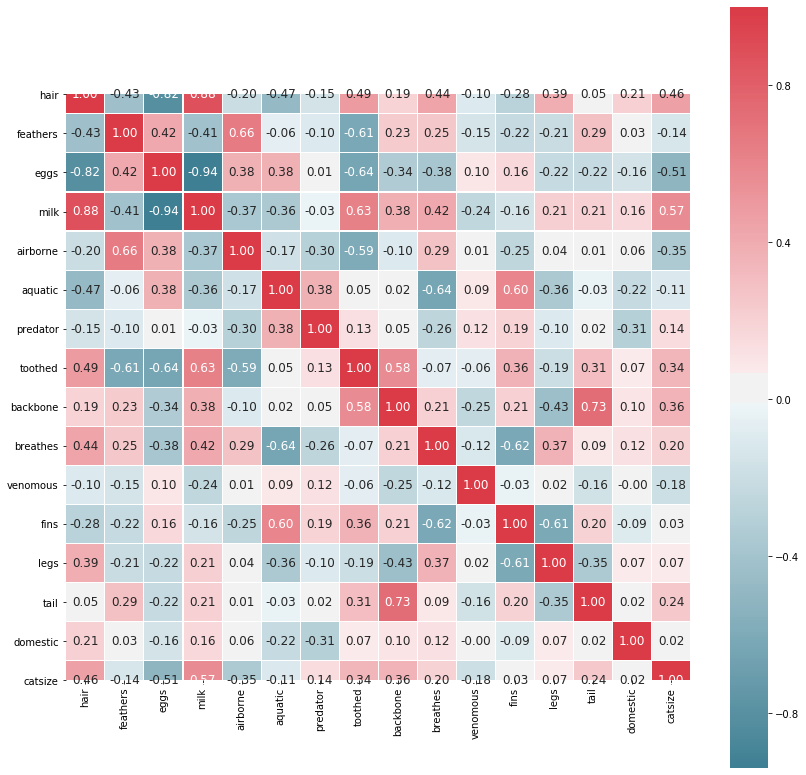

In [7]:
corr = zoo.iloc[:,1:-1].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},cmap = colormap, linewidths=0.1, linecolor='white')

In [23]:
X = zoo.iloc[:,:-1]
X.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [24]:
Y = zoo.iloc[:,-1:]
Y.head()

,class_type
0,1
1,1
2,4
3,1
4,1


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print("Training Data has",train_x.shape)
print("Testing Data has",test_x.shape)

Training Data has (75, 16)
Testing Data has (26, 16)


In [30]:
#Drop the animal_name column in train, test datasets, because it's unnecessary for model learning predictions.
train_name = X_train['animal_name']
test_name = X_test['animal_name']

X_train = X_train.iloc[:,1:]
X_test = X_test.iloc[:,1:]

Logistic Regression Sklearn

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
reg = LogisticRegression()

In [31]:
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
reg.score(X_train, y_train)

0.9857142857142858

In [33]:
y_test_pred = reg.predict(X_test)

In [36]:
import math as m
rms = m.sqrt(mean_squared_error(y_test, y_test_pred))
mse = mean_squared_error(y_test, y_test_pred) 
mae = mean_absolute_error(y_test, y_test_pred)
print("RMSE:",rms)
print("MSE: ", mse)
print("MAE: ", mae)

RMSE: 0.1796053020267749
MSE:  0.03225806451612903
MAE:  0.03225806451612903


Decision Tree

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [63]:
from sklearn.tree import DecisionTreeClassifier

train_name = X_train['animal_name']
test_name = X_test['animal_name']

X_train = X_train.iloc[:,1:]
X_test = X_test.iloc[:,1:]

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("training accuracy :", model.score(X_train, y_train))
print("testing accuracy :", model.score(X_test, y_test))

training accuracy : 1.0
testing accuracy : 0.967741935483871


Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, Y_train)
print("training accuracy :", model.score(X_train, Y_train))
print("testing accuracy :", model.score(X_test, Y_test))

training accuracy : 1.0
testing accuracy : 0.967741935483871


Custom Logistic Regression

In [167]:
def normalize(X):
    mean = np.mean(X)
    std = np.std(X)
    X_new = (X - mean) / std
    return  X_new, mean, std

In [169]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [170]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [171]:
def h(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

In [172]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m ==0:
        return None
    J = (-y * np.log(h(X, theta)) - (1 - y) * np.log(1 - h(X, theta))).mean()
    return J

In [173]:
def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    
    J = cost_function(X, y, theta)
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        theta = theta - alpha*np.dot(X.T, (h(X, theta) - y))/m;
        
        J = cost_function(X, y, theta)
        
        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
        
        if abs(J-J_history[-2]) < epsilon:
            break
            
    return theta, J_history

In [174]:
def predict(X, mean, std, theta):
    predictions =  h(prepare_X(X), theta)
    return predictions

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [186]:
train_name = X_train['animal_name']
test_name = X_test['animal_name']


X_train = X_train.drop(['animal_name'], axis=1)
X_test = X_test.drop(['animal_name'], axis=1)

In [187]:
X_train.shape

(70, 16)

In [188]:
y_train.shape

(70, 1)

In [191]:
import numpy as np 
theta = np.zeros((16,1))


In [192]:
X_new, mean, std = normalize(X_train)
y_train = y_train.values.reshape(70,1)

In [193]:
cost_function(X_train, y_train, theta)

0.6931471805599455

In [194]:
new_theta, Js = gradient_descent(X_train, y_train, theta, 0.01, 1e-7, 1000, False)
print(new_theta, len(Js))

[[2.86960457e+00]
 [2.00719748e+00]
 [1.74605634e+01]
 [1.48400007e-02]
 [5.15026294e+00]
 [9.16442551e+00]
 [1.04550923e+01]
 [4.88425007e+00]
 [7.17778283e+00]
 [1.14620623e+01]
 [3.14592263e+00]
 [2.58630693e+00]
 [6.37848707e+01]
 [6.88801017e+00]
 [1.14719826e+00]
 [1.87543772e+00]] 1001


In [195]:
y_pred = h(X_test, new_theta)

In [196]:
rms = m.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
print("RMSE:",rms)
print("MSE: ", mse)
print("MAE: ", mae)

RMSE: 2.633530685404678
MSE:  6.935483870968033
MAE:  1.8387096774193792


In [208]:
recall = recall_score(y_test, y_test_pred, average='macro')
print("recall: ", recall)

recall:  0.9285714285714286
